In [1]:
# Import dependency
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime
import os
import pandas as pd
import seaborn as sns
import gmaps
import os

In [2]:
# Output File (CSV)
output_data_file = "Source Data/Cafes_and_restaurants__with_seating_capacity.csv"

In [3]:
# Reading the file and convert into a Dataframe
raw_df = pd.read_csv(output_data_file)
raw_df.head()

Census year  Block ID  Property ID  Base property ID  \
0         2002         2       111467            103973   
1         2002         2       111467            103973   
2         2002         4       103972            103972   
3         2002         4       103972            103972   
4         2002         4       103972            103972   

                         Building address  CLUE small area  \
0            0 King Street MELBOURNE 3000  Melbourne (CBD)   
1            0 King Street MELBOURNE 3000  Melbourne (CBD)   
2  363-397 Flinders Street MELBOURNE 3000  Melbourne (CBD)   
3  363-397 Flinders Street MELBOURNE 3000  Melbourne (CBD)   
4  363-397 Flinders Street MELBOURNE 3000  Melbourne (CBD)   

                                  Business address  Industry (ANZSIC4) code  \
0               469-479 King Street MELBOURNE 3000                     8921   
1               469-479 King Street MELBOURNE 3000                     8921   
2     Vault 12, 387 Flinders Street MELBOURNE 3000                     9539   
3  Vault 1, 363-367 Flinders Street MELBOURNE 3000                     9111   
4  Vault 1, 363-367 Flinders Street MELBOURNE 3000                     9111   

                      Industry (ANZSIC4) description     Seating type  \
0         Zoological and Botanical Gardens Operation   Seats - Indoor   
1         Zoological and Botanical Gardens Operation  Seats - Outdoor   
2                     Other Personal Services n.e.c.   Seats - Indoor   
3  Health and Fitness Centres and Gymnasia Operation   Seats - Indoor   
4  Health and Fitness Centres and Gymnasia Operation  Seats - Outdoor   

  Number of seats  x coordinate  y coordinate                   Location  
0             113      144.9595      -37.8206  POINT (144.9595 -37.8206)  
1              38      144.9595      -37.8206  POINT (144.9595 -37.8206)  
2              15      144.9623      -37.8195  POINT (144.9623 -37.8195)  
3              20      144.9623      -37.8195  POINT (144.9623 -37.8195)  
4              18      144.9623      -37.8195  POINT (144.9623 -37.8195)

In [4]:
# Identify the variety of industry types within the dataset
unique_industry = raw_df['Industry (ANZSIC4) description'].unique()
industry_count = len(unique_industry)
print(unique_industry)
print(f'Number of total industry: {industry_count}')

['Zoological and Botanical Gardens Operation'
 'Other Personal Services n.e.c.'
 'Health and Fitness Centres and Gymnasia Operation'
 'Other Gambling Activities' 'Cafes and Restaurants'
 'Takeaway Food Services' 'Pubs, Taverns and Bars' 'Accommodation'
 'Internet Service Providers and Web Search Portals'
 'Fruit and Vegetable Retailing' 'Other Specialised Food Retailing'
 'Clubs (Hospitality)' 'Oil and Gas Extraction'
 'Other Interest Group Services n.e.c.'
 'Business and Professional Association Services'
 'Sport and Camping Equipment Retailing' 'Newspaper and Book Retailing'
 'Convenience Store' 'Professional Photographic Services'
 'Motor Cycle Retailing' 'Higher Education'
 'Fruit and Vegetable Wholesaling' 'Other Administrative Services n.e.c.'
 'Fresh Meat, Fish and Poultry Retailing'
 'Computer System Design and Related Services' 'Common Area'
 'Performing Arts Venue Operation'
 'Sports and Physical Recreation Clubs and Sports Professionals'
 'Fuel Retailing'
 'Horse and Dog Rac

In [5]:
# Identify the number of unique address (by the business address) within the dataset
unique_business_address = raw_df['Business address'].unique()
unique_business_address_count = len(unique_business_address)
print(unique_business_address)
print(f'Number of total unique address: {unique_business_address_count}')

['469-479 King Street MELBOURNE 3000'
 'Vault 12, 387 Flinders Street MELBOURNE 3000'
 'Vault 1, 363-367 Flinders Street MELBOURNE 3000' ...
 '29 Melrose Street NORTH MELBOURNE VIC 3051'
 '31 Melrose Street NORTH MELBOURNE VIC 3051'
 '17 Melrose Street NORTH MELBOURNE VIC 3051']
Number of total unique address: 6917


In [6]:
# Identify the number of unique location within the dataset, which should match with the business address
unique_Location = raw_df['Location'].unique()
unique_Location_count = len(unique_business_address)
print(unique_Location)
print(f'Number of total unique Location: {unique_Location_count}')

['POINT (144.9595 -37.8206)' 'POINT (144.9623 -37.8195)'
 'POINT (144.9653 -37.8187)' ... 'POINT (144.9353015 -37.79142168)'
 'POINT (144.9356959 -37.79223169)' 'POINT (144.9311131 -37.79436219)']
Number of total unique Location: 6917


In [7]:
# Identify the number of unique location by "Building address" within the dataset.
by_building = raw_df.set_index('Building address').groupby(['Building address'])
by_building.head()

Census year  Block ID  Property ID  \
Building address                                                               
0 King Street MELBOURNE 3000                     2002         2       111467   
0 King Street MELBOURNE 3000                     2002         2       111467   
363-397 Flinders Street MELBOURNE 3000           2002         4       103972   
363-397 Flinders Street MELBOURNE 3000           2002         4       103972   
363-397 Flinders Street MELBOURNE 3000           2002         4       103972   
...                                               ...       ...          ...   
72 Stubbs Street KENSINGTON VIC 3031             2020      2539       614669   
25-77 Stubbs Street KENSINGTON VIC 3031          2020      2540       617955   
25-77 Stubbs Street KENSINGTON VIC 3031          2020      2540       617955   
169-173 Rankins Road KENSINGTON VIC 3031         2020      2546       615281   
169-173 Rankins Road KENSINGTON VIC 3031         2020      2546       615281   

                                          Base property ID  CLUE small area  \
Building address                                                              
0 King Street MELBOURNE 3000                        103973  Melbourne (CBD)   
0 King Street MELBOURNE 3000                        103973  Melbourne (CBD)   
363-397 Flinders Street MELBOURNE 3000              103972  Melbourne (CBD)   
363-397 Flinders Street MELBOURNE 3000              103972  Melbourne (CBD)   
363-397 Flinders Street MELBOURNE 3000              103972  Melbourne (CBD)   
...                                                    ...              ...   
72 Stubbs Street KENSINGTON VIC 3031                614669       Kensington   
25-77 Stubbs Street KENSINGTON VIC 3031             617955       Kensington   
25-77 Stubbs Street KENSINGTON VIC 3031             617955       Kensington   
169-173 Rankins Road KENSINGTON VIC 3031            615281       Kensington   
169-173 Rankins Road KENSINGTON VIC 3031            615281       Kensington   

                                                                         Business address  \
Building address                                                                            
0 King Street MELBOURNE 3000                           469-479 King Street MELBOURNE 3000   
0 King Street MELBOURNE 3000                           469-479 King Street MELBOURNE 3000   
363-397 Flinders Street MELBOURNE 3000       Vault 12, 387 Flinders Street MELBOURNE 3000   
363-397 Flinders Street MELBOURNE 3000    Vault 1, 363-367 Flinders Street MELBOURNE 3000   
363-397 Flinders Street MELBOURNE 3000    Vault 1, 363-367 Flinders Street MELBOURNE 3000   
...                                                                                   ...   
72 Stubbs Street KENSINGTON VIC 3031                 72 Stubbs Street KENSINGTON VIC 3031   
25-77 Stubbs Street KENSINGTON VIC 3031              61 Stubbs Street KENSINGTON VIC 3031   
25-77 Stubbs Street KENSINGTON VIC 3031              61 Stubbs Street KENSINGTON VIC 3031   
169-173 Rankins Road KENSINGTON VIC 3031             169 Rankins Road KENSINGTON VIC 3031   
169-173 Rankins Road KENSINGTON VIC 3031             173 Rankins Road KENSINGTON VIC 3031   

                                          Industry (ANZSIC4) code  \
Building address                                                    
0 King Street MELBOURNE 3000                                 8921   
0 King Street MELBOURNE 3000                                 8921   
363-397 Flinders Street MELBOURNE 3000                       9539   
363-397 Flinders Street MELBOURNE 3000                       9111   
363-397 Flinders Street MELBOURNE 3000                       9111   
...                                                           ...   
72 Stubbs Street KENSINGTON VIC 3031                         4511   
25-77 Stubbs Street KENSINGTON VIC 3031                      4511   
25-77 Stubbs Street KENSINGTON VIC 3031                      4511   
169-

In [8]:
### --- RECATEGORISATION OF INDUSTRY AND CLEANING DATA --- ###
# Consolidate the industry type into 5 categories being:
# - The top 4 most frequent "Industry (ANZSIC4) description" category; and
# - All other categories will be re-categorised into "Others".

## For each unique "Industry (ANZSIC4) description" count how many time it appears in the data set.
IndustryCount_df = pd.DataFrame(raw_df.groupby("Industry (ANZSIC4) description").size())
IndustryCount_df.rename(columns = {0:"Count"}, inplace = True)
IndustryCount_df.head()

## Sort IndustryCount_df descending order by column "Count"
IndustryCount_df = IndustryCount_df.sort_values(by=["Count"], ascending = False)

## Show dataframe's top 4 most frequent category. These categories will be kept as is.
## All other categories will be reclassified to "Others"
IndustryCount_df.head(4)

Count
Industry (ANZSIC4) description       
Cafes and Restaurants           40431
Takeaway Food Services           7445
Pubs, Taverns and Bars           3282
Accommodation                     999

In [9]:
### COMMENCE RECATEGORISATION PROCESS
## Insert new column called "Recategorised Industry".
raw_df["Recategorised Industry"]=""
raw_df.head()

## Populate the "Recategorised Industry" Column to either state one of the top 4 industry or
## "Others" if it is not one of the top 4 industry.
def categorize(row):
    if row["Industry (ANZSIC4) description"]== "Cafes and Restaurants" :
        return "Cafes and Restaurants"
    elif row["Industry (ANZSIC4) description"]== "Takeaway Food Services" :
        return "Takeaway Food Services"
    elif row["Industry (ANZSIC4) description"]== "Pubs, Taverns and Bars" :
        return "Pubs, Taverns and Bars"
    elif row["Industry (ANZSIC4) description"]== "Accommodation" :
        return "Accommodation"
    else:
        return "Others"
raw_df["Recategorised Industry"]= raw_df.apply(lambda row: categorize(row), axis = 1)
raw_df

Census year  Block ID  Property ID  Base property ID  \
0             2002         2       111467            103973   
1             2002         2       111467            103973   
2             2002         4       103972            103972   
3             2002         4       103972            103972   
4             2002         4       103972            103972   
...            ...       ...          ...               ...   
54047         2020      2540       617955            617955   
54048         2020      2540       617955            617955   
54049         2020      2546       615281            615281   
54050         2020      2546       615281            615281   
54051         2020      2546       615281            615281   

                               Building address  CLUE small area  \
0                  0 King Street MELBOURNE 3000  Melbourne (CBD)   
1                  0 King Street MELBOURNE 3000  Melbourne (CBD)   
2        363-397 Flinders Street MELBOURNE 3000  Melbourne (CBD)   
3        363-397 Flinders Street MELBOURNE 3000  Melbourne (CBD)   
4        363-397 Flinders Street MELBOURNE 3000  Melbourne (CBD)   
...                                         ...              ...   
54047   25-77 Stubbs Street KENSINGTON VIC 3031       Kensington   
54048   25-77 Stubbs Street KENSINGTON VIC 3031       Kensington   
54049  169-173 Rankins Road KENSINGTON VIC 3031       Kensington   
54050  169-173 Rankins Road KENSINGTON VIC 3031       Kensington   
54051  169-173 Rankins Road KENSINGTON VIC 3031       Kensington   

                                      Business address  \
0                   469-479 King Street MELBOURNE 3000   
1                   469-479 King Street MELBOURNE 3000   
2         Vault 12, 387 Flinders Street MELBOURNE 3000   
3      Vault 1, 363-367 Flinders Street MELBOURNE 3000   
4      Vault 1, 363-367 Flinders Street MELBOURNE 3000   
...                                                ...   
54047             61 Stubbs Street KENSINGTON VIC 3031   
54048             61 Stubbs Street KENSINGTON VIC 3031   
54049             169 Rankins Road KENSINGTON VIC 3031   
54050             173 Rankins Road KENSINGTON VIC 3031   
54051             173 Rankins Road KENSINGTON VIC 3031   

       Industry (ANZSIC4) code  \
0                         8921   
1                         8921   
2                         9539   
3                         9111   
4                         9111   
...                        ...   
54047                     4511   
54048                     4511   
54049                     4511   
54050                     4511   
54051                     4511   

                          Industry (ANZSIC4) description     Seating type  \
0             Zoological and Botanical Gardens Operation   Seats - Indoor   
1             Zoological and Botanical Gardens Operation  Seats - Outdoor   
2                         Other Personal Services n.e.c.   Seats - Indoor   
3      Health and Fitness Centres and Gymnasia Operation   Seats - Indoor   
4      Health and Fitness Centres and Gymnasia Operation  Seats - Outdoor   
...                                                  ...              ...   
54047                              Cafes and Restaurants  Seats - Outdoor   
54048                              Cafes and Restaurants   Seats - Indoor   
54049                              Cafes and Restaurants   Seats - Indoor   
54050                              Cafes and Restaurants   Seats - Indoor   
54051                              Cafes and Restaurants  Seats - Outdoor   

      Number of seats  x coordinate  y coordinate  \
0                 113     144.95950     -37.82060   
1                  38     144.95950     -37.82060   
2                  15     144.96230     -37.81950   
3                  20     144.96230     -37.81950   
4                  18     144.96230     -37.81950   
...               ...           ...           ...   
54047               8     144.9

In [10]:
### IDENTIFY ROWS WITH MISSING DATA AND DELETE ROWS
## Drop any rows with missing data
cleanraw_df = raw_df.dropna()
cleanraw_df

Census year  Block ID  Property ID  Base property ID  \
0             2002         2       111467            103973   
1             2002         2       111467            103973   
2             2002         4       103972            103972   
3             2002         4       103972            103972   
4             2002         4       103972            103972   
...            ...       ...          ...               ...   
54047         2020      2540       617955            617955   
54048         2020      2540       617955            617955   
54049         2020      2546       615281            615281   
54050         2020      2546       615281            615281   
54051         2020      2546       615281            615281   

                               Building address  CLUE small area  \
0                  0 King Street MELBOURNE 3000  Melbourne (CBD)   
1                  0 King Street MELBOURNE 3000  Melbourne (CBD)   
2        363-397 Flinders Street MELBOURNE 3000  Melbourne (CBD)   
3        363-397 Flinders Street MELBOURNE 3000  Melbourne (CBD)   
4        363-397 Flinders Street MELBOURNE 3000  Melbourne (CBD)   
...                                         ...              ...   
54047   25-77 Stubbs Street KENSINGTON VIC 3031       Kensington   
54048   25-77 Stubbs Street KENSINGTON VIC 3031       Kensington   
54049  169-173 Rankins Road KENSINGTON VIC 3031       Kensington   
54050  169-173 Rankins Road KENSINGTON VIC 3031       Kensington   
54051  169-173 Rankins Road KENSINGTON VIC 3031       Kensington   

                                      Business address  \
0                   469-479 King Street MELBOURNE 3000   
1                   469-479 King Street MELBOURNE 3000   
2         Vault 12, 387 Flinders Street MELBOURNE 3000   
3      Vault 1, 363-367 Flinders Street MELBOURNE 3000   
4      Vault 1, 363-367 Flinders Street MELBOURNE 3000   
...                                                ...   
54047             61 Stubbs Street KENSINGTON VIC 3031   
54048             61 Stubbs Street KENSINGTON VIC 3031   
54049             169 Rankins Road KENSINGTON VIC 3031   
54050             173 Rankins Road KENSINGTON VIC 3031   
54051             173 Rankins Road KENSINGTON VIC 3031   

       Industry (ANZSIC4) code  \
0                         8921   
1                         8921   
2                         9539   
3                         9111   
4                         9111   
...                        ...   
54047                     4511   
54048                     4511   
54049                     4511   
54050                     4511   
54051                     4511   

                          Industry (ANZSIC4) description     Seating type  \
0             Zoological and Botanical Gardens Operation   Seats - Indoor   
1             Zoological and Botanical Gardens Operation  Seats - Outdoor   
2                         Other Personal Services n.e.c.   Seats - Indoor   
3      Health and Fitness Centres and Gymnasia Operation   Seats - Indoor   
4      Health and Fitness Centres and Gymnasia Operation  Seats - Outdoor   
...                                                  ...              ...   
54047                              Cafes and Restaurants  Seats - Outdoor   
54048                              Cafes and Restaurants   Seats - Indoor   
54049                              Cafes and Restaurants   Seats - Indoor   
54050                              Cafes and Restaurants   Seats - Indoor   
54051                              Cafes and Restaurants  Seats - Outdoor   

      Number of seats  x coordinate  y coordinate  \
0                 113     144.95950     -37.82060   
1                  38     144.95950     -37.82060   
2                  15     144.96230     -37.81950   
3                  20     144.96230     -37.81950   
4                  18     144.96230     -37.81950   
...               ...           ...           ...   
54047               8     144.9

# Rosa's Bits

In [11]:
cleanraw_df.to_csv("./cleanraw_df.csv")

In [12]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas_profiling

In [14]:
pandas_profiling.ProfileReport(cleanraw_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
# #summary
#total census year
census_year = cleanraw_df['Census year'].unique()
census_year_count = len(census_year)
#total industry
unique_industry = cleanraw_df['Industry (ANZSIC4) description'].unique()
industry_count = len(unique_industry)
#after regroup
recat=cleanraw_df['Recategorised Industry'].unique()
RecatIndustry=len(recat)
#total address by bulding address
building_address = cleanraw_df['Building address'].unique()
building_address1 = len(building_address)
#seating type
seating_type = cleanraw_df['Seating type'].unique()
seating_type = len(seating_type)
#total suburb
suburb_area = cleanraw_df['CLUE small area'].unique()
suburb_area  = len(suburb_area)

summary_data = pd.DataFrame({"Total Census Year":[census_year_count],
                            "Total Industry":[industry_count],
                            "Regrouping Industry":[RecatIndustry],
                            "Total Property per Year": [building_address1],
                            "Total Seating Type":[seating_type ],
                            "Total Suburb":[suburb_area ]})
summary_data

Total Census Year  Total Industry  Regrouping Industry  \
0                 19              69                    5   

   Total Property per Year  Total Seating Type  Total Suburb  
0                     3132                   2            13

In [16]:
cleanraw_df.dtypes

Census year                         int64
Block ID                            int64
Property ID                         int64
Base property ID                    int64
Building address                   object
CLUE small area                    object
Business address                   object
Industry (ANZSIC4) code             int64
Industry (ANZSIC4) description     object
Seating type                       object
Number of seats                    object
x coordinate                      float64
y coordinate                      float64
Location                           object
Recategorised Industry             object
dtype: object

In [17]:
#convert object to integer for number of seats
#cleanraw_df = cleanraw_df.astype("Number of seats":"int64")
cleanraw_df['Number of seats'] = cleanraw_df['Number of seats'].str.replace(',','').astype(int)
cleanraw_df.dtypes

C:\Users\2mini\AppData\Local\Temp/ipykernel_4484/2260117798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanraw_df['Number of seats'] = cleanraw_df['Number of seats'].str.replace(',','').astype(int)


Census year                         int64
Block ID                            int64
Property ID                         int64
Base property ID                    int64
Building address                   object
CLUE small area                    object
Business address                   object
Industry (ANZSIC4) code             int64
Industry (ANZSIC4) description     object
Seating type                       object
Number of seats                     int32
x coordinate                      float64
y coordinate                      float64
Location                           object
Recategorised Industry             object
dtype: object

In [18]:
#aggregrate the data by census year, Recategorised industry and Number of seat per seating type (indoor and outdoor)
df1 = pd.pivot_table(cleanraw_df, index=['Census year','Recategorised Industry'],values=['Number of seats'],aggfunc=np.sum, columns=["Seating type"])
df1

Number of seats                
Seating type                        Seats - Indoor Seats - Outdoor
Census year Recategorised Industry                                
2002        Accommodation                     5412              28
            Cafes and Restaurants            75970           10222
            Others                            9428             187
            Pubs, Taverns and Bars           10526             666
            Takeaway Food Services            1819             791
...                                            ...             ...
2020        Accommodation                     4954             295
            Cafes and Restaurants           112064           25499
            Others                           16357             693
            Pubs, Taverns and Bars           13037            3187
            Takeaway Food Services            3993            1725

[95 rows x 2 columns]

In [19]:
#aggregrate the data by census year, Recategorised industry and Number of seat per suburb (indoor and outdoor)
df2 = pd.pivot_table(cleanraw_df, index=['Census year','CLUE small area'],values=['Number of seats'],aggfunc=np.sum, columns=["Seating type"])
df2

Number of seats                
Seating type                              Seats - Indoor Seats - Outdoor
Census year CLUE small area                                             
2002        Carlton                                10701            2223
            Docklands                               4975             226
            East Melbourne                          4033             180
            Kensington                              3842              32
            Melbourne (CBD)                        58487            5895
...                                                  ...             ...
2020        Port Melbourne                           821             430
            South Yarra                              670             140
            Southbank                              16879            4336
            West Melbourne (Industrial)               60               8
            West Melbourne (Residential)            2394             479

[247 rows x 2 columns]

## Per Seat Vs Industry

In [20]:
#aggregrate the data by number of seat per industry (indoor and outdoor)
df4 = pd.pivot_table(cleanraw_df, index=['Recategorised Industry'],values=['Number of seats'],aggfunc=np.sum, columns=["Seating type"])
df4

Number of seats                
Seating type            Seats - Indoor Seats - Outdoor
Recategorised Industry                                
Accommodation                   101113            4355
Cafes and Restaurants          1922524          438444
Others                          240694            9920
Pubs, Taverns and Bars          261575           41732
Takeaway Food Services           65290           29709

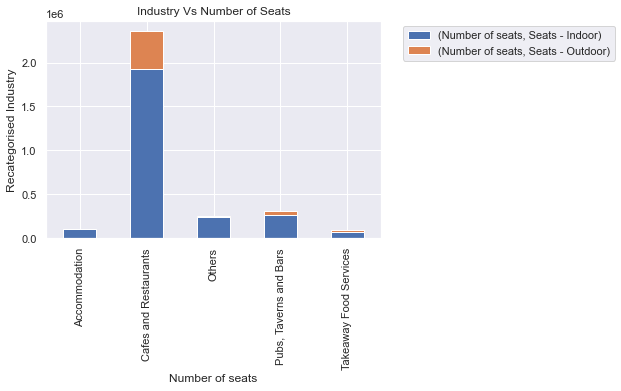

In [55]:
df4.plot.bar(stacked=True, xlabel='Number of seats', ylabel='Recategorised Industry')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Industry Vs Number of Seats")
plt.show()

## Per Seat for Each Suburb per Year

In [22]:
#aggregrate the data by number of seat for each year per suburb (indoor and outdoor)
df5 = pd.pivot_table(cleanraw_df, index=['Census year'],values=['Number of seats'],aggfunc=np.sum, columns=["CLUE small area"])
df5

Number of seats                                      \
CLUE small area         Carlton Docklands East Melbourne Kensington   
Census year                                                           
2002                      12924      5201           4213       3874   
2003                      14081      7709           5336       3874   
2004                      14081      7709           5336       4080   
2005                      14652     11632           6840       4080   
2006                      14652     11632           6840       4145   
2007                      15113     12357           6521       4145   
2008                      15113     12357           6351       4794   
2009                      15598     15680           6515       4794   
2010                      15598     15680           6515       4794   
2011                      15598     15680           6515       5039   
2012                      15958     17903           6664       5039   
2013                      15958     17903           6664       5448   
2014                      15859     21511           7494       5448   
2015                      15859     21511           7494       5618   
2016                      17540     22992           7754       5618   
2017                      17540     22992           7754       5635   
2018                      15779     22192           7599       5635   
2019                      15779     22192           7599       5709   
2020                      15177     21585           7181       5709   

                                                                       \
CLUE small area Melbourne (CBD) Melbourne (Remainder) North Melbourne   
Census year                                                             
2002                      64382                  7063            3326   
2003                      64382                  7063            4101   
2004                      69265                  7610            4101   
2005                      77321                  7610            4466   
2006                      80163                  7602            4466   
2007                      74353                  7602            4833   
2008                      75684                  8481            4833   
2009                      80246                  8481            4976   
2010                      83853                  8792            4976   
2011                      87459                  8792            4976   
2012                      88896                  8792            4891   
2013                      91862                  9058            4891   
2014                      95614                  9058            5209   
2015                      97422                  9692            5209   
2016                      98715                  9692            5520   
2017                      99773                  8469            5520   
2018                      98313                  8469            5438   
2019                      96706                  8982            5438   
2020                      88974                  8767            4499   

                                                                \
CLUE small area Parkville Port Melbourne South Yarra Southbank   
Census year                                                      
2002                 2014             91         638      8439   
2003                 2379             91         638      8439   
2004                 2379            416         625      9032   
2005                 2447            416         625      9032   
2006                 2447            647         730     10583   
2007                 2573            647         730     10583   
2008                 2573            666         725     11004   
2009                 2573            666         725     11004   
2010                 2886           1095         725     11004   
2011                 2886           1095         741  

#### CARLTON ####

In [76]:
DataCarl=df5.loc[:,'Number of seats']
DataCarl=DataCarl.loc[:,'Carlton']
DataCarl
DataCarl.pct_change()


Census year
2002         NaN
2003    0.089523
2004    0.000000
2005    0.040551
2006    0.000000
2007    0.031463
2008    0.000000
2009    0.032092
2010    0.000000
2011    0.000000
2012    0.023080
2013    0.000000
2014   -0.006204
2015    0.000000
2016    0.105997
2017    0.000000
2018   -0.100399
2019    0.000000
2020   -0.038152
Name: Carlton, dtype: float64

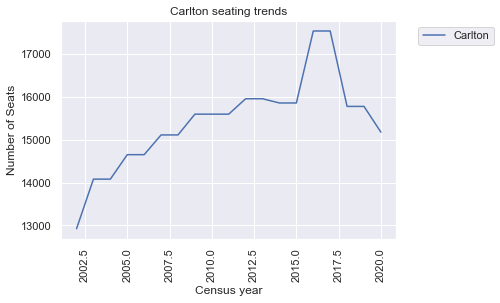

In [75]:
DataCarl.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Carlton seating trends")
plt.show()

##### Docklands ####

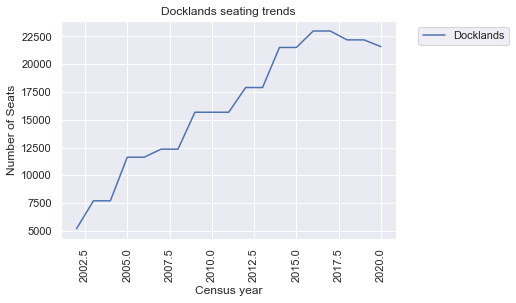

In [58]:
DataDocks=df5.loc[:,'Number of seats']
DataDocks=DataDocks.loc[:,'Docklands']
DataDocks

DataDocks.pct_change()

DataDocks.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Docklands seating trends")
plt.show()

#### East Melbourne

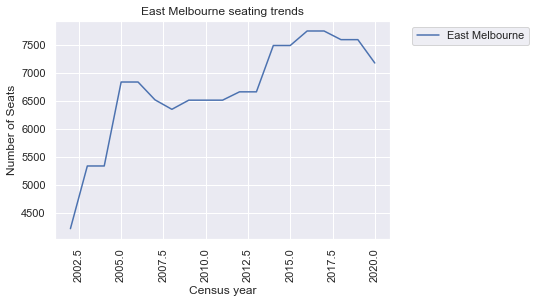

In [59]:
DataEast=df5.loc[:,'Number of seats']
DataEast=DataEast.loc[:,'East Melbourne']
DataEast
DataEast.pct_change()

DataEast.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("East Melbourne seating trends")
plt.show()

#### Melbourne (CBD)

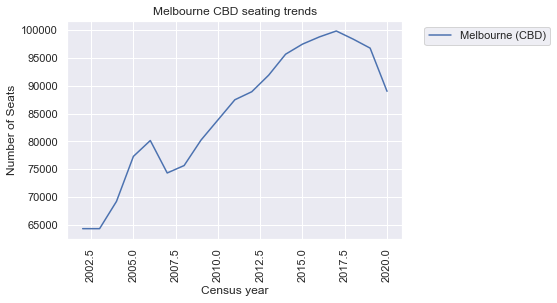

In [60]:
DataCBD=df5.loc[:,'Number of seats']
DataCBD=DataCBD.loc[:,'Melbourne (CBD)']
DataCBD
DataCBD.pct_change()

DataCBD.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Melbourne CBD seating trends")
plt.show()

#### Kensington

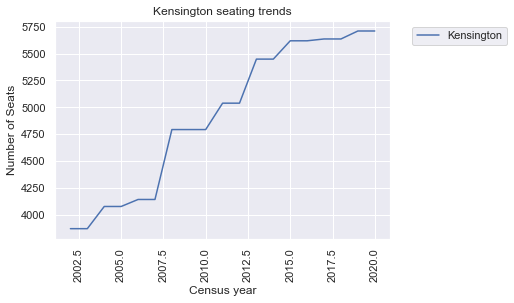

In [61]:
DataKen=df5.loc[:,'Number of seats']
DataKen=DataKen.loc[:,'Kensington']
DataKen
DataKen.pct_change()

DataKen.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Kensington seating trends")
plt.show()

##### Melbourne (Remainder)

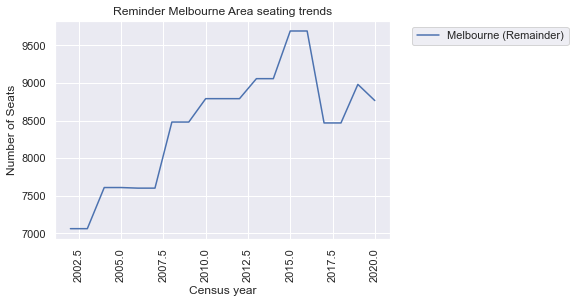

In [62]:
DataMelb=df5.loc[:,'Number of seats']
DataMelb=DataMelb.loc[:,'Melbourne (Remainder)']
DataMelb
DataMelb.pct_change()

DataMelb.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Reminder Melbourne Area seating trends")
plt.show()

#### North Melbourne

In [95]:
DataNMel=df5.loc[:,'Number of seats']
DataNMel=DataNMel.loc[:,'North Melbourne']
DataNMel
DataNMel.pct_change()

Census year
2002         NaN
2003    0.233013
2004    0.000000
2005    0.089003
2006    0.000000
2007    0.082176
2008    0.000000
2009    0.029588
2010    0.000000
2011    0.000000
2012   -0.017082
2013    0.000000
2014    0.065017
2015    0.000000
2016    0.059704
2017    0.000000
2018   -0.014855
2019    0.000000
2020   -0.172674
Name: North Melbourne, dtype: float64

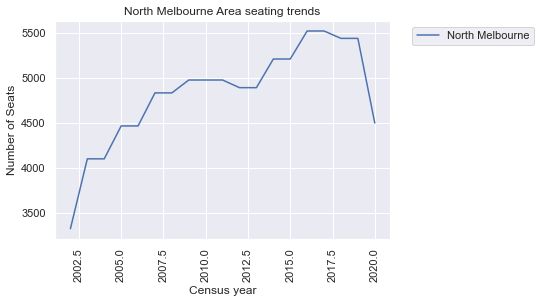

In [96]:
DataNMel.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("North Melbourne Area seating trends")
plt.show()

#### Parkville

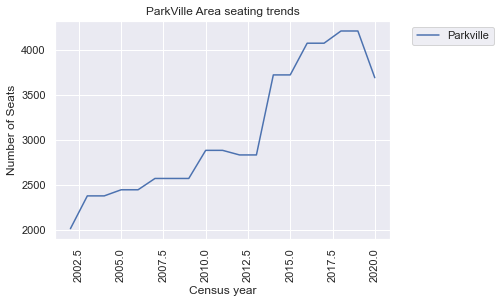

In [64]:
DataPvil=df5.loc[:,'Number of seats']
DataPvil=DataPvil.loc[:,'Parkville']
DataPvil
DataPvil.pct_change()
DataPvil.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("ParkVille Area seating trends")
plt.show()

#### Port Melbourne	

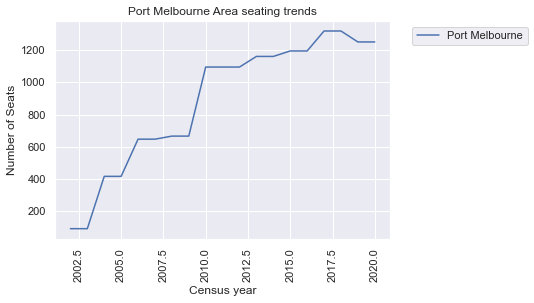

In [65]:
DataPMel=df5.loc[:,'Number of seats']
DataPMel=DataPMel.loc[:,'Port Melbourne']
DataPMel
DataPMel.pct_change()
DataPMel.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Port Melbourne Area seating trends")
plt.show()

#### South Yarra

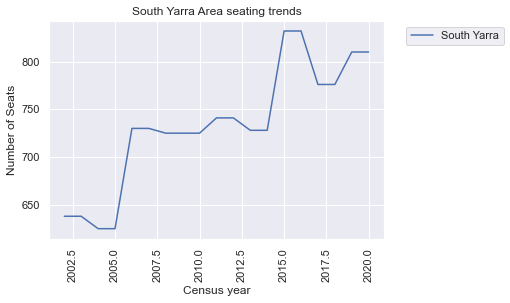

In [66]:
DataSYar=df5.loc[:,'Number of seats']
DataSYar=DataSYar.loc[:,'South Yarra']
DataSYar
DataSYar.pct_change()
DataSYar.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("South Yarra Area seating trends")
plt.show()

#### Southbank

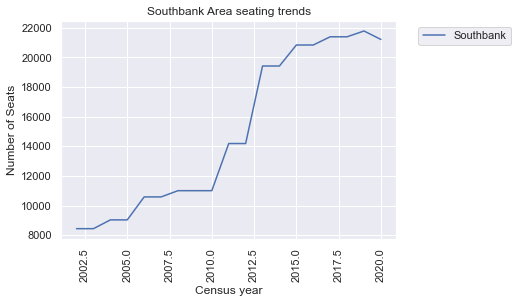

In [68]:
DataSBan=df5.loc[:,'Number of seats']
DataSBan=DataSBan.loc[:,'Southbank']
DataSBan
DataSBan.pct_change()
DataSBan.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Southbank Area seating trends")
plt.show()

#### West Melbourne (Industrial)

In [80]:
DataWmel=df5.loc[:,'Number of seats']
DataWmel=DataWmel.loc[:,'West Melbourne (Industrial)']
DataWmel
DataWmel.pct_change()

Census year
2002         NaN
2003   -0.102161
2004    0.000000
2005    0.032823
2006    0.000000
2007   -0.423729
2008    0.000000
2009    0.522059
2010    0.000000
2011    0.000000
2012   -0.036232
2013    0.000000
2014    0.077694
2015    0.000000
2016   -0.811628
2017    0.000000
2018   -0.037037
2019    0.000000
2020   -0.128205
Name: West Melbourne (Industrial), dtype: float64

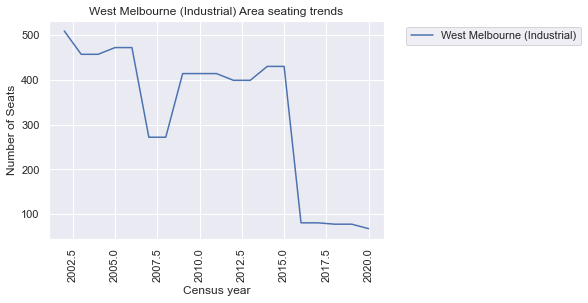

In [78]:

DataWmel.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("West Melbourne (Industrial) Area seating trends")
plt.show()

#### West Melbourne (Residential)

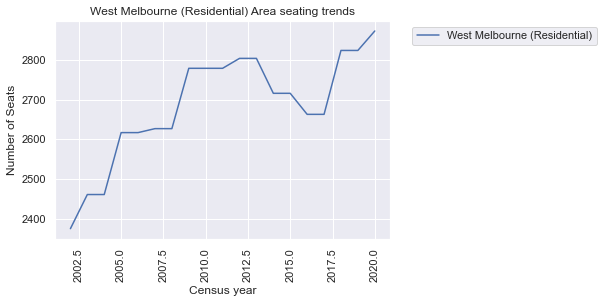

In [70]:
DataResW=df5.loc[:,'Number of seats']
DataResW=DataResW.loc[:,'West Melbourne (Residential)']
DataResW
DataResW.pct_change()
DataResW.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("West Melbourne (Residential) Area seating trends")
plt.show()

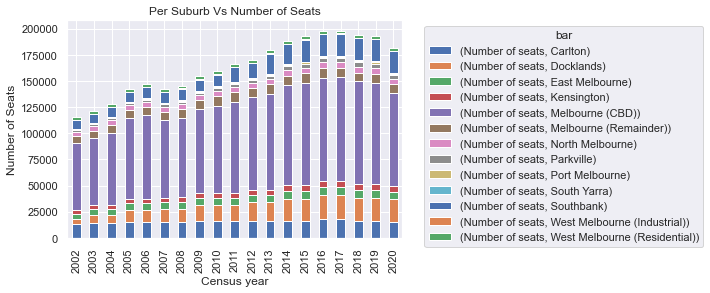

In [71]:
df5.plot.bar(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(title='bar', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Per Suburb Vs Number of Seats")
plt.show()

Text(0, 0.5, 'total seat')

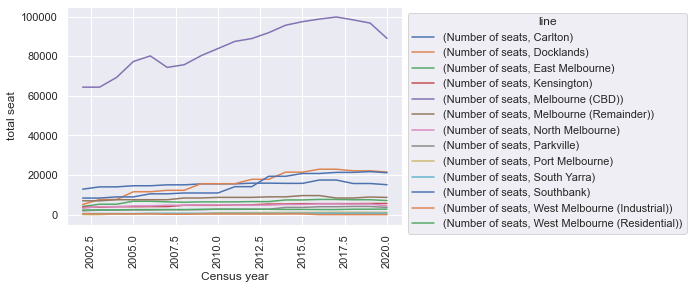

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
pd.pivot_table(cleanraw_df, index=['Census year'],values=['Number of seats'],aggfunc=np.sum, columns=["CLUE small area"]).plot()
plt.legend(title='line', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=90)
plt.ylabel('total seat')

## Breakdown of Industry based on seating type Per Year

In [72]:
#aggregrate the data by number of seat for each year per suburb (indoor and outdoor)
df6 = pd.pivot_table(cleanraw_df, index=['Census year'],values=['Number of seats'],aggfunc=np.sum, columns=["Recategorised Industry","Seating type"])
df6

Number of seats                                        \
Recategorised Industry   Accommodation                 Cafes and Restaurants   
Seating type            Seats - Indoor Seats - Outdoor        Seats - Indoor   
Census year                                                                    
2002                              5412              28                 75970   
2003                              5782              28                 78887   
2004                              6190              30                 79370   
2005                              5772             155                 89884   
2006                              7011             183                 91491   
2007                              7243             208                 87637   
2008                              5519             200                 90558   
2009                              5304             235                 95939   
2010                              5394             235                 92952   
2011                              4983             281                 98469   
2012                              4808             281                101627   
2013                              4183             278                109541   
2014                              4205             305                115951   
2015                              4439             305                117487   
2016                              4805             327                120822   
2017                              4826             311                122284   
2018                              5059             335                121019   
2019                              5224             335                120572   
2020                              4954             295                112064   

                                                                       \
Recategorised Industry                         Others                   
Seating type           Seats - Outdoor Seats - Indoor Seats - Outdoor   
Census year                                                             
2002                             10222           9428             187   
2003                             11762           9466             263   
2004                             14600          10454             361   
2005                             18262           8981             274   
2006                             18876           8988             308   
2007                             18911           8541             388   
2008                             20538           8817             417   
2009                             22496           9104             556   
2010                             23686          14428             636   
2011                             24982          14686             690   
2012                             26273          14936             709   
2013                             28565          14491             659   
2014                             29464          15121             606   
2015                             29400          15404             626   
2016                             29914          15413             646   
2017                             29690          15673             642   
2018                             27898          15241             552   
2019                             27406          15165             707   
2020                             25499          16357             693   

                                                               \
Recategorised Industry Pubs, Taverns and Bars                   
Seating type                   Seats - Indoor Seats - Outdoor   
Census year                                                     
2002                                    10526             666   
2003                                    11343             736   
2004                                    12084             966   
2005                                    13427  

#### accomodation

Text(0.5, 1.0, 'Accomodation and Seating Type')

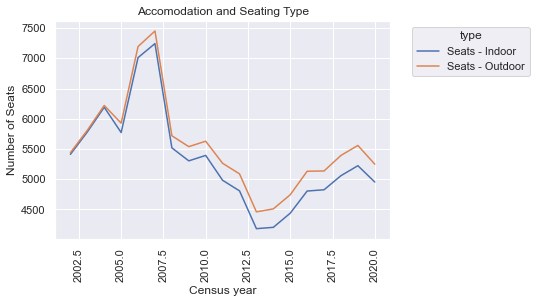

In [40]:
DataAcom=df6.loc[:,('Number of seats', 'Accommodation')]
DataAcom
DataAcom.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(title='type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Accomodation and Seating Type")

#### Cafes and Restaurants

Text(0.5, 1.0, 'Cafes and Restaurants and Seating Type')

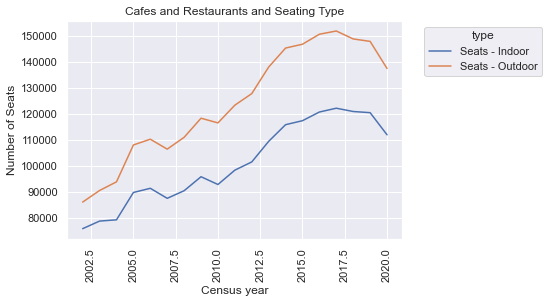

In [41]:
DataCafe=df6.loc[:,('Number of seats', 'Cafes and Restaurants')]
DataCafe
DataCafe.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(title='type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Cafes and Restaurants and Seating Type")

#### Others

Text(0.5, 1.0, 'Others and Seating Type')

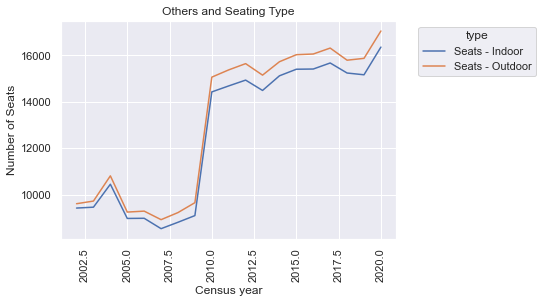

In [42]:
DataOth=df6.loc[:,('Number of seats', 'Others')]
DataOth
DataOth.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(title='type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Others and Seating Type")

#### Pubs, Taverns and Bars

Text(0.5, 1.0, 'Pubs, Taverns and Bars and Seating Type')

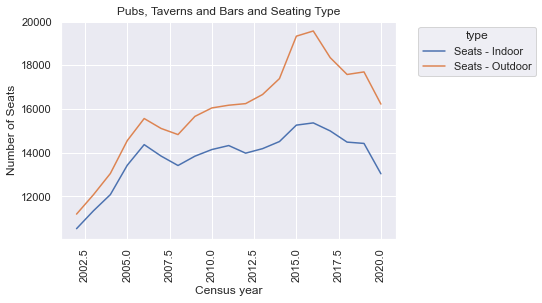

In [43]:
DataPub=df6.loc[:,('Number of seats', 'Pubs, Taverns and Bars')]
DataPub
DataPub.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(title='type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Pubs, Taverns and Bars and Seating Type")

#### Takeaway Food Services

Text(0.5, 1.0, 'Takeaway Food Services')

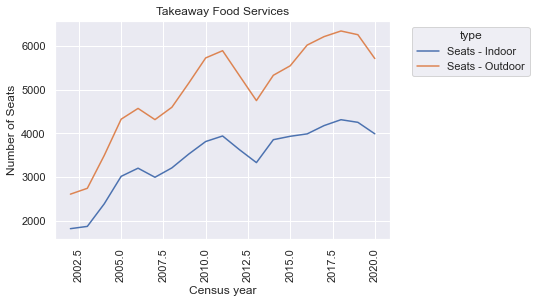

In [44]:
DataTake=df6.loc[:,('Number of seats', 'Takeaway Food Services')]
DataTake
DataTake.plot.line(stacked=True, xlabel='Census year', ylabel='Number of Seats')
plt.legend(title='type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Takeaway Food Services")

### Trend over Industry and Number of Seats

Text(0.5, 1.0, 'Industry Vs Number of Seats')

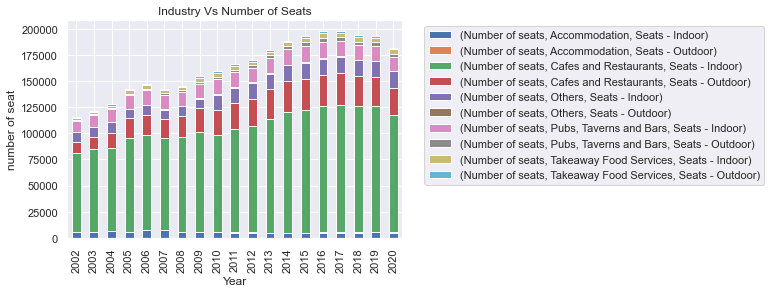

In [45]:
df6.plot.bar(stacked=True, xlabel='Year', ylabel='number of seat')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.title("Industry Vs Number of Seats")

In [46]:
#aggregrate the data by number of seat for each year per suburb (indoor and outdoor)
df7 = pd.pivot_table(cleanraw_df, index=['Recategorised Industry'],values=["Number of seats","Seating type"],aggfunc=np.sum, columns=["Census year"])
df7

Number of seats                                        \
Census year                       2002   2003   2004    2005    2006    2007   
Recategorised Industry                                                         
Accommodation                     5440   5810   6220    5927    7194    7451   
Cafes and Restaurants            86192  90649  93970  108146  110367  106548   
Others                            9615   9729  10815    9255    9296    8929   
Pubs, Taverns and Bars           11192  12079  13050   14554   15564   15110   
Takeaway Food Services            2610   2744   3497    4328    4575    4318   

                                                                        \
Census year               2008    2009    2010    2011    2012    2013   
Recategorised Industry                                                   
Accommodation             5719    5539    5629    5264    5089    4461   
Cafes and Restaurants   111096  118435  116638  123451  127900  138106   
Others                    9234    9660   15064   15376   15645   15150   
Pubs, Taverns and Bars   14830   15661   16048   16173   16246   16662   
Takeaway Food Services    4601    5156    5732    5897    5324    4754   

                                                                                
Census year               2014    2015    2016    2017    2018    2019    2020  
Recategorised Industry                                                          
Accommodation             4510    4744    5132    5137    5394    5559    5249  
Cafes and Restaurants   145415  146887  150736  151974  148917  147978  137563  
Others                   15727   16030   16059   16315   15793   15872   17050  
Pubs, Taverns and Bars   17390   19331   19568   18350   17579   17696   16224  
Takeaway Food Services    5334    5552    6026    6220    6349    6264    5718

Text(0, 0.5, 'total seat')

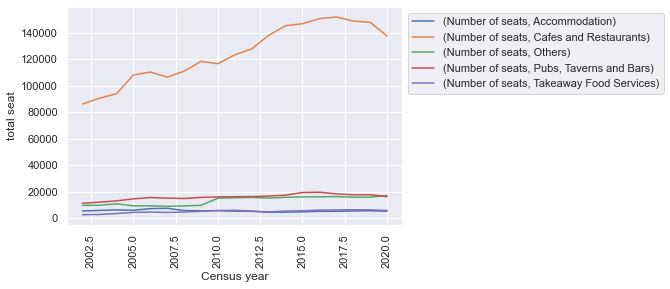

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
pd.pivot_table(cleanraw_df, index=['Census year'],values=['Number of seats'],aggfunc=np.sum, columns=["Recategorised Industry"]).plot()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=90)
plt.ylabel('total seat')

In [48]:
# Import API key
from config import gkey
!pip install ipywidgets

In [73]:
cleanraw_df.dtypes

Census year                        object
Block ID                            int64
Property ID                         int64
Base property ID                    int64
Building address                   object
CLUE small area                    object
Business address                   object
Industry (ANZSIC4) code             int64
Industry (ANZSIC4) description     object
Seating type                       object
Number of seats                     int32
x coordinate                      float64
y coordinate                      float64
Location                           object
Recategorised Industry             object
dtype: object

In [50]:
cleanraw_df['Census year'] =cleanraw_df['Census year'].astype('object')
cleanraw_df.dtypes

C:\Users\2mini\AppData\Local\Temp/ipykernel_4484/959287960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanraw_df['Census year'] =cleanraw_df['Census year'].astype('object')


Census year                        object
Block ID                            int64
Property ID                         int64
Base property ID                    int64
Building address                   object
CLUE small area                    object
Business address                   object
Industry (ANZSIC4) code             int64
Industry (ANZSIC4) description     object
Seating type                       object
Number of seats                     int32
x coordinate                      float64
y coordinate                      float64
Location                           object
Recategorised Industry             object
dtype: object

In [51]:
# Identify 
year_2020=dict(list(cleanraw_df.groupby('Census year')))[2020]
year_2020

Census year  Block ID  Property ID  Base property ID  \
5188         2020       502       105226            105226   
5189         2020      1005       108797            108797   
5190         2020      1006       642756            642756   
50816        2020         1       611394            611394   
50817        2020         1       611394            611394   
...           ...       ...          ...               ...   
54047        2020      2540       617955            617955   
54048        2020      2540       617955            617955   
54049        2020      2546       615281            615281   
54050        2020      2546       615281            615281   
54051        2020      2546       615281            615281   

                                        Building address  \
5188         207 Kensington Road WEST MELBOURNE VIC 3003   
5189          93-119 Sims Street WEST MELBOURNE VIC 3003   
5190   Lot 163, 410 Footscray Road WEST MELBOURNE VIC...   
50816         545-557 Flinders Street MELBOURNE VIC 3000   
50817         545-557 Flinders Street MELBOURNE VIC 3000   
...                                                  ...   
54047            25-77 Stubbs Street KENSINGTON VIC 3031   
54048            25-77 Stubbs Street KENSINGTON VIC 3031   
54049           169-173 Rankins Road KENSINGTON VIC 3031   
54050           169-173 Rankins Road KENSINGTON VIC 3031   
54051           169-173 Rankins Road KENSINGTON VIC 3031   

                   CLUE small area  \
5188   West Melbourne (Industrial)   
5189   West Melbourne (Industrial)   
5190   West Melbourne (Industrial)   
50816              Melbourne (CBD)   
50817              Melbourne (CBD)   
...                            ...   
54047                   Kensington   
54048                   Kensington   
54049                   Kensington   
54050                   Kensington   
54051                   Kensington   

                                        Business address  \
5188         207 Kensington Road WEST MELBOURNE VIC 3003   
5189     Part 93-111 Sims Street WEST MELBOURNE VIC 3003   
5190   Lot 163, 410 Footscray Road WEST MELBOURNE VIC...   
50816             551 Flinders Street MELBOURNE VIC 3000   
50817             551 Flinders Street MELBOURNE VIC 3000   
...                                                  ...   
54047               61 Stubbs Street KENSINGTON VIC 3031   
54048               61 Stubbs Street KENSINGTON VIC 3031   
54049               169 Rankins Road KENSINGTON VIC 3031   
54050               173 Rankins Road KENSINGTON VIC 3031   
54051               173 Rankins Road KENSINGTON VIC 3031   

       Industry (ANZSIC4) code Industry (ANZSIC4) description  \
5188                      4512         Takeaway Food Services   
5189                      4512         Takeaway Food Services   
5190                      4512         Takeaway Food Services   
50816                     4511          Cafes and Restaurants   
50817                     4511          Cafes and Restaurants   
...                        ...                            ...   
54047                     4511          Cafes and Restaurants   
54048                     4511          Cafes and Restaurants   
54049                     4511          Cafes and Restaurants   
54050                     4511          Cafes and Restaurants   
54051                     4511          Cafes and Restaurants   

          Seating type  Number of seats  x coordinate  y coordinate  \
5188    Seats - Indoor               30     144.91651     -37.80087   
5189    Seats - Indoor                8     144.91063     -37.80381   
5190    Seats - Indoor               22     144.93427     -37.80895   
50816   Seats - Indoor               60     144.95651     -37.82098   
50817  Seats - Outdoor                6     144.95651     -37.82098   
...                ...              ...           ...           ...   
54047  Seats - Outdoor                8     144.93570     -37.79223   
54048   Seats

In [52]:
#sorting the location based on largest number of seat and determine the maps
year_2020_seating=year_2020.nlargest(10,'Number of seats')
year_2020_seating

Census year  Block ID  Property ID  Base property ID  \
53254        2020       659       614000            100847   
53167        2020       570       108810            108810   
53253        2020       658       110266            110266   
53723        2020      1103       558180            558180   
53360        2020       752       110736            110736   
53727        2020      1103       558180            558180   
53517        2020       803       111175            110477   
51425        2020        43       101154            101154   
53178        2020       601       109604            109604   
52348        2020        85       105746            105746   

                                        Building address  \
53254  Rod Laver Arena Melbourne Park 200 Batman Aven...   
53167  Flemington Racecourse 428-514 Epsom Road FLEMI...   
53253     MCG 120 Brunton Avenue EAST MELBOURNE VIC 3002   
53723  Marvel Stadium 122-148 Harbour Esplanade DOCKL...   
53360  NGV International 130-200 St Kilda Road SOUTHB...   
53727  Marvel Stadium 122-148 Harbour Esplanade DOCKL...   
53517  Crown Entertainment Complex 8 Whiteman Street ...   
51425  RACV Building 483-501 Bourke Street MELBOURNE ...   
53178    576-594 Victoria Parade EAST MELBOURNE VIC 3002   
52348  Melbourne Central 183-265 La Trobe Street MELB...   

             CLUE small area  \
53254  Melbourne (Remainder)   
53167             Kensington   
53253         East Melbourne   
53723              Docklands   
53360              Southbank   
53727              Docklands   
53517              Southbank   
51425        Melbourne (CBD)   
53178         East Melbourne   
52348        Melbourne (CBD)   

                                        Business address  \
53254  Part Rod Laver Arena Melbourne Park 200 Batman...   
53167  VRC Administration Offices 448 Epsom Road FLEM...   
53253  Part MCG 120 Brunton Avenue EAST MELBOURNE VIC...   
53723  Part Level 1 140 Harbour Esplanade DOCKLANDS V...   
53360   Part Ground 180 St Kilda Road SOUTHBANK VIC 3006   
53727  Marvel Stadium 740 Bourke Street DOCKLANDS VIC...   
53517  Crown Entertainment Complex Crown Casino 8 Whi...   
51425               501 Bourke Street MELBOURNE VIC 3000   
53178  Catholic Leadership Centre 576 Victoria Parade...   
52348  Shop 311, Level 3 300 Lonsdale Street MELBOURN...   

       Industry (ANZSIC4) code  \
53254                     4513   
53167                     9121   
53253                     4511   
53723                     4511   
53360                     4511   
53727                     9113   
53517                     9201   
51425                     4400   
53178                     9540   
52348                     4511   

                          Industry (ANZSIC4) description    Seating type  \
53254                                  Catering Services  Seats - Indoor   
53167  Horse and Dog Racing Administration and Track ...  Seats - Indoor   
53253                              Cafes and Restaurants  Seats - Indoor   
53723                              Cafes and Restaurants  Seats - Indoor   
53360                              Cafes and Restaurants  Seats - Indoor   
53727  Sports and Physical Recreation Venues, Grounds...  Seats - Indoor   
53517                                   Casino Operation  Seats - Indoor   
51425                                      Accommodation  Seats - Indoor   
53178                                 Religious Services  Seats - Indoor   
52348                              Cafes and Restaurants  Seats - Indoor   

       Number of seats  x coordinate  y coordinate  \
53254             4920     144.97901     -37.82130   
53167             3660     144.91286     -37.78906   
53253             3240     144.98316     -37.82000   
53723             2640     144.94747     -37.81649   
53360             1000     144.96867     -37.82277   
53727              950     144.94747     -37.81649   
53517              805     144.95835     -37.82315   
5142

In [53]:
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)

marker_locations = year_2020_seating[['y coordinate','x coordinate']]

fig =gmaps.figure(map_type='HYBRID')
markers = gmaps.marker_layer(marker_locations)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

#### INDUSTRY GROWTH PER SUBURB PER YEAR

# Dhiren's Bits

# Michael's Bits

# Brandon' Bits